In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from lls import LinearLeastSquare

Download House Price (Tehran, Iran) dataset from [Kaggle](https://www.kaggle.com/datasets/mokar2001/house-price-tehran-iran) or [GitHub](https://github.com/mokar2001/House-Price-Tehran-Iran)

In [2]:
# Load data
data = pd.read_csv("HousePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
# Preprocess data
data.drop("Address", axis=1, inplace=True)
data.replace([True, False], [1, 0], inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,1,1,1,1.850000e+09,61666.67
1,60,1,1,1,1,1.850000e+09,61666.67
2,79,2,1,1,1,5.500000e+08,18333.33
3,95,2,1,1,1,9.025000e+08,30083.33
4,123,2,1,1,1,7.000000e+09,233333.33


In [4]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.672959,0.197698,0.076829,0.052384,0.722647,0.722647
Room,0.672959,1.000000,0.274952,0.129956,0.181718,0.567610,0.567610
Parking,0.197698,0.274952,1.000000,0.430804,0.430893,0.190532,0.190532
Warehouse,0.076829,0.129956,0.430804,1.000000,0.201921,0.109971,0.109971
Elevator,0.052384,0.181718,0.430893,0.201921,1.000000,0.111861,0.111861
Price,0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000
Price(USD),0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000


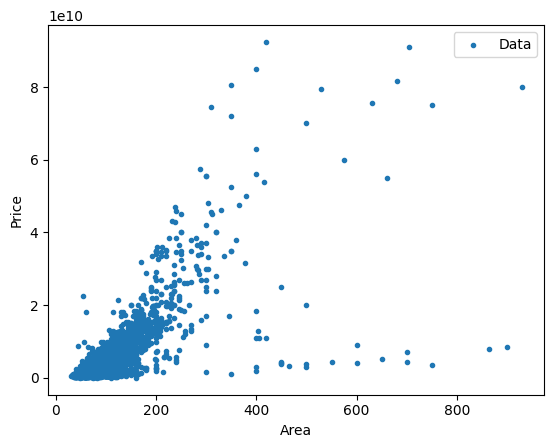

In [5]:
plt.scatter(data['Area'], data['Price'], marker='.')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(["Data"])
plt.show()

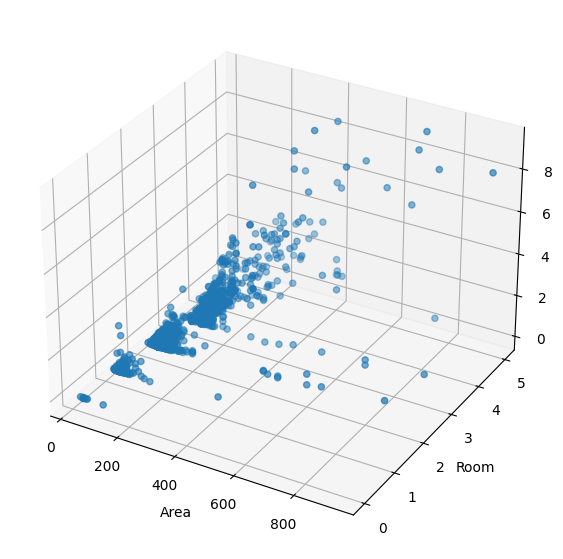

In [21]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter(data['Area'], data['Room'], data['Price'])
ax.set_xlabel('Area')
ax.set_ylabel('Room')
ax.set_zlabel('Price')
plt.show()

In [44]:
X = np.array(data[["Area", "Room"]])
Y = np.array(data[["Price"]])

print(X.shape)
print(Y.shape)

(3473, 2)
(3473, 1)


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2604, 2)
(2604, 1)
(869, 2)
(869, 1)


In [46]:
lls = LinearLeastSquare()
lls.fit(X_train, Y_train)

In [47]:
Y_pred = lls.predict(X_test)

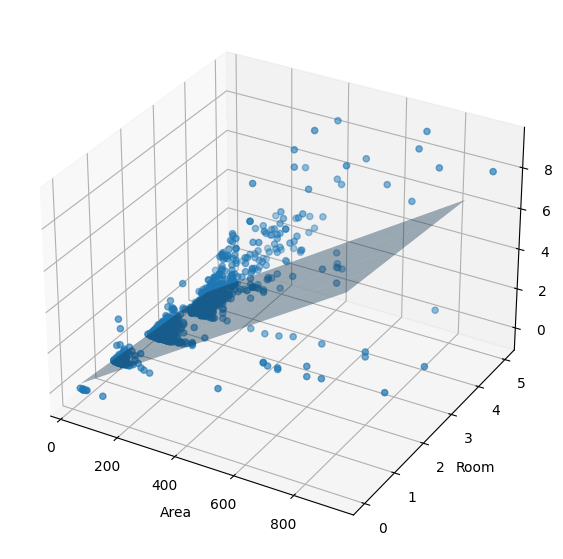

In [49]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

x_arange = np.arange(X_train[:,0].min(), X_train[:,0].max())
y_arange = np.arange(X_train[:,1].min(), X_train[:,1].max())
px, py = np.meshgrid(x_arange, y_arange)
 
pz = px * lls.w[0] + py * lls.w[1]
ax.plot_surface(px, py, pz, alpha = 0.4)

ax.scatter(data['Area'], data['Room'], data['Price'])
ax.set_xlabel('Area')
ax.set_ylabel('Room')
ax.set_zlabel('Price')
plt.show()

In [50]:
lls.evaluate(X_test, Y_test, "MAE")

3086608524.345897

In [51]:
# predict

x_test = np.array([[170, 3]])
y_pred = lls.predict(x_test)
print("Price:", y_pred[0, 0])

Price: 10227194461.230745
